Exploratory Data Analysis (EDA) on Retail Sales Data


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

df = pd.read_csv("./Dataset/retail_sales_dataset.csv")

In [3]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [4]:
df.tail(10)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
990,991,2023-12-26,CUST991,Female,34,Clothing,2,50,100
991,992,2023-08-21,CUST992,Female,57,Electronics,2,30,60
992,993,2023-02-06,CUST993,Female,48,Electronics,3,50,150
993,994,2023-12-18,CUST994,Female,51,Beauty,2,500,1000
994,995,2023-04-30,CUST995,Female,41,Clothing,1,30,30
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150
999,1000,2023-04-12,CUST1000,Male,47,Electronics,4,30,120


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [7]:
df.drop_duplicates()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [9]:
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [10]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [11]:
#ordering data by date so as to do Time series Analysis

df= df.sort_values(by="Date")
df.head(5)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
521,522,2023-01-01,CUST522,Male,46,Beauty,3,500,1500
179,180,2023-01-01,CUST180,Male,41,Clothing,3,300,900
558,559,2023-01-01,CUST559,Female,40,Clothing,4,300,1200
302,303,2023-01-02,CUST303,Male,19,Electronics,3,30,90
978,979,2023-01-02,CUST979,Female,19,Beauty,1,25,25


In [14]:
#########Time series Analysis

#converting date to date_time format
df["Date"] = pd.to_datetime(df["Date"])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 521 to 649
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 78.1+ KB


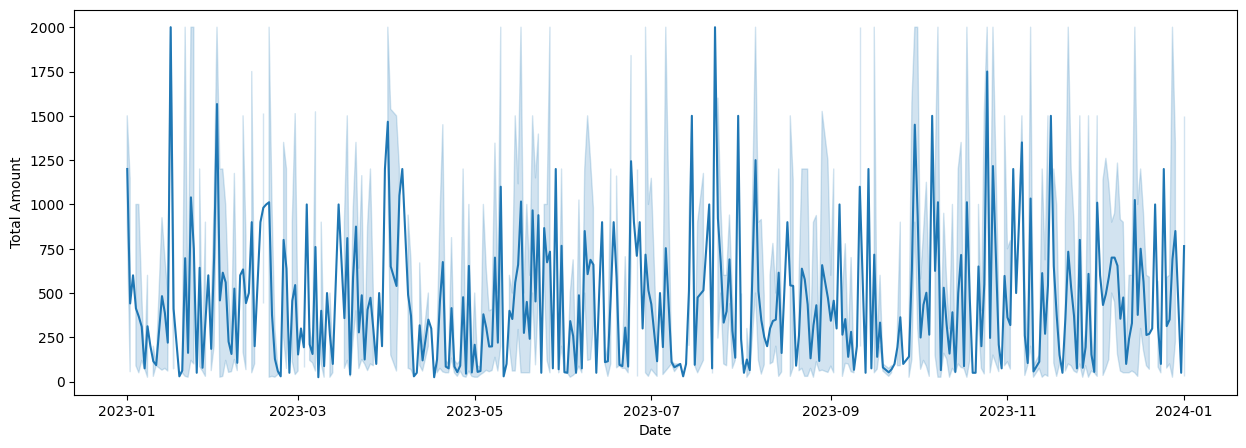

In [16]:
#obtaining a plot of total Amount of particular dates with seaborn

plt.figure(figsize =(15,5))
sns.lineplot(x="Date", y="Total Amount", data=df)
plt.show()

In [17]:
# Time series Analysis by Month

##creating Month and Date Columns

df["Month"] = df["Date"].dt.month
df["Year"] = df["Date"].dt.year

In [19]:
## calculating Total monthly_sales

Monthly_sales = df.groupby(["Year","Month"], as_index=False)["Total Amount"].sum()
df['Monthly_sales']= Monthly_sales['Total Amount']

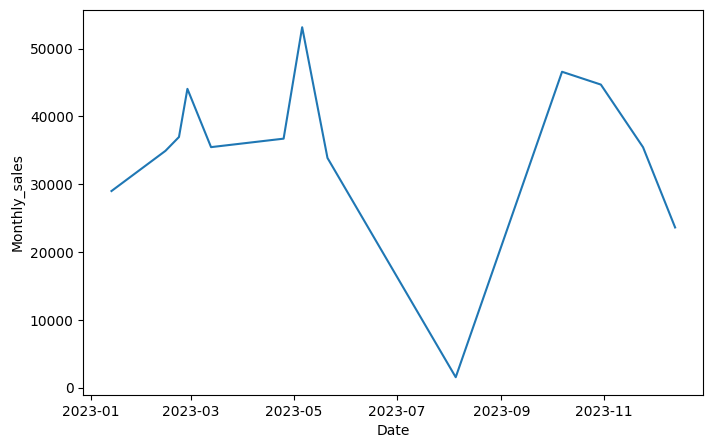

In [20]:
plt.figure(figsize=(8,5))
sns.lineplot(x="Date",y="Monthly_sales",data=df)
plt.show()

In [21]:
#Deleting Month,year,and monthly sales columns for customer and product Analysis

df = df.drop(['Month','Year','Monthly_sales'],axis=1)
df.head(10)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
521,522,2023-01-01,CUST522,Male,46,Beauty,3,500,1500
179,180,2023-01-01,CUST180,Male,41,Clothing,3,300,900
558,559,2023-01-01,CUST559,Female,40,Clothing,4,300,1200
302,303,2023-01-02,CUST303,Male,19,Electronics,3,30,90
978,979,2023-01-02,CUST979,Female,19,Beauty,1,25,25
162,163,2023-01-02,CUST163,Female,64,Clothing,3,50,150
420,421,2023-01-02,CUST421,Female,37,Clothing,3,500,1500
609,610,2023-01-03,CUST610,Female,26,Beauty,2,300,600
682,683,2023-01-04,CUST683,Male,38,Beauty,2,500,1000
230,231,2023-01-04,CUST231,Female,23,Clothing,3,50,150


CUSTOMER AND PRODUCT ANALYSIS


In [22]:
#creating age brackets

age_bins = [10,20,30,40,50,60]
age_labels = ['10-19', '20-29', '30-39', '40-49', '50+']
df["Age group"] = pd.cut(df["Age"],bins=age_bins, labels=age_labels, right=True)

In [24]:
#Calculating total amount spent by each AGE GROUP

total_amount_by_age = df.groupby('Age group')['Total Amount'].sum()
print(total_amount_by_age)

Age group
10-19     34730
20-29     98215
30-39     95950
40-49     93795
50+      100085
Name: Total Amount, dtype: int64


C:\Users\Saiban N Pagarkar\AppData\Local\Temp\ipykernel_48836\766825469.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_amount_by_age = df.groupby('Age group')['Total Amount'].sum()


In [25]:
#GRouping by Age group and Product category and calculating the sum of product

Grouped_data = df.groupby(['Age group', 'Product Category'])['Total Amount'].sum().reset_index()

C:\Users\Saiban N Pagarkar\AppData\Local\Temp\ipykernel_48836\2809564039.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Grouped_data = df.groupby(['Age group', 'Product Category'])['Total Amount'].sum().reset_index()


c:\Users\Saiban N Pagarkar\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:250: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


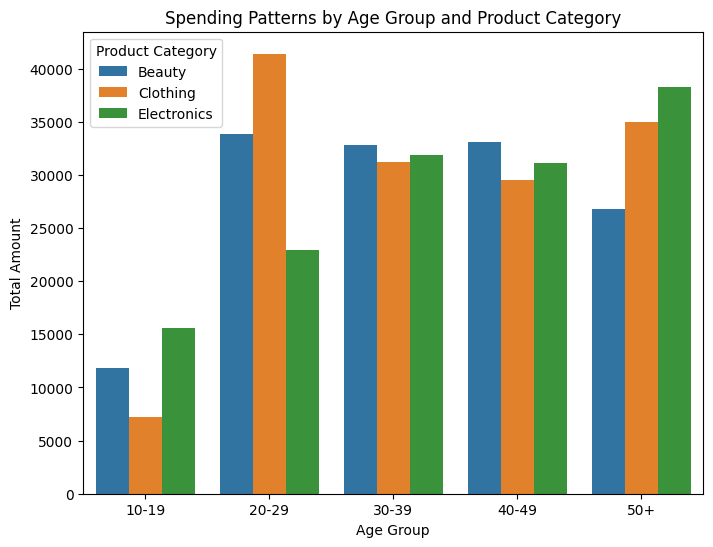

In [26]:
plt.figure(figsize=(8,6))
sns.barplot(x='Age group', y='Total Amount', hue='Product Category',data= Grouped_data)
plt.title('Spending Patterns by Age Group and Product Category')
plt.xlabel('Age Group')
plt.ylabel('Total Amount')
plt.show()

In [27]:
# Gender spending analysis

# Calculating total amount spent by each gender

Gender_Totalspend = df.groupby('Gender')['Total Amount'].sum().reset_index()
print(Gender_Totalspend)



   Gender  Total Amount
0  Female        232840
1    Male        223160


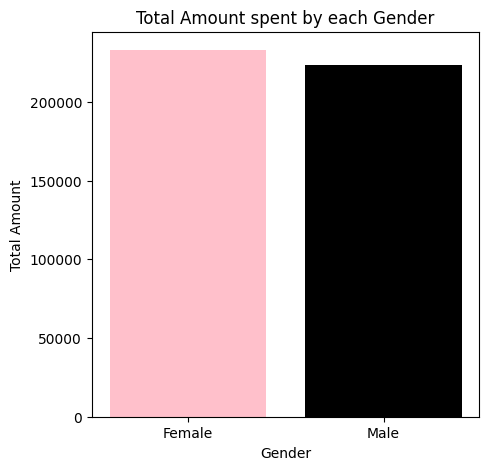

In [28]:
plt.figure(figsize=(5,5))
plt.bar(Gender_Totalspend['Gender'], Gender_Totalspend['Total Amount'], color = ['pink', 'black'])
plt.title('Total Amount spent by each Gender')
plt.xlabel('Gender')
plt.ylabel('Total Amount')
plt.show()

In [29]:
#Product preferenece by gender

Gender_preference = df.groupby(['Gender', 'Product Category'])['Total Amount'].sum().reset_index()

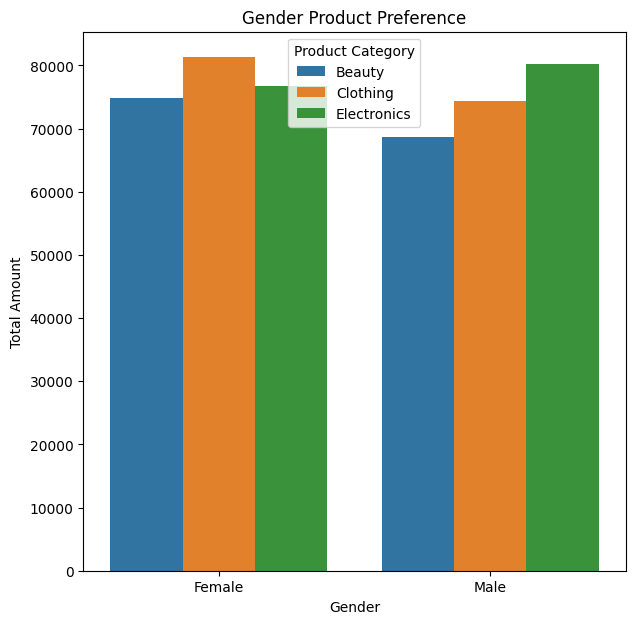

In [32]:
plt.figure(figsize=(7,7))
sns.barplot(x='Gender', y='Total Amount', hue='Product Category',data=Gender_preference)
plt.title('Gender Product Preference')
plt.xlabel('Gender')
plt.ylabel('Total Amount')
plt.show()

In [33]:
#Total Amount spent by Average Male vs Female

Avg_amount_by_Gender = df.groupby('Gender')['Total Amount'].mean()
print(Avg_amount_by_Gender)

Gender
Female    456.549020
Male      455.428571
Name: Total Amount, dtype: float64


In [34]:
Total_num = df.groupby('Product Category')['Quantity'].sum().reset_index()
print(Total_num)

  Product Category  Quantity
0           Beauty       771
1         Clothing       894
2      Electronics       849
